In [1]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [2]:
import nn_project
import collections
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from stop_words import get_stop_words
from wordcloud import WordCloud

In [3]:
samples_en, samples_cs, vocab_en, vocab_cs = nn_project.data.get_data(
    limit=100000,
    vocab_size=50,
)

In [4]:
for sample in itertools.islice(zip(samples_en, samples_cs), 10):
    print(sample)

(['Construction', 'and', 'repair', 'of', 'highways', 'and', '...'], ['Výstavba', 'a', 'oprava', 'automobilových', 'cest', 'a', '...'])
(['Services', 'of', 'language', 'translation', 'with', 'use', 'of', '...'], ['Služby', 'jazykového', 'překladu', 's', 'použití', 'spojení', '...'])
(['Services', 'in', 'maintenance', 'service', 'and', 'repair', '...'], ['Služby', 'technické', 'obsluhy', 'a', 'opravy', 'nákladních', '...'])
(['Services', 'in', 'maintenance', 'service', 'and', 'repair', '...'], ['Služby', 'technické', 'obsluhy', 'a', 'opravy', 'osobných', '...'])
(['Translator', 'Internet', 'is', 'a', 'Toolbar', 'for', 'MS', 'Internet', 'Explorer', '.', 'It', 'allows', 'you', 'to', 'translate', 'in', 'real', 'time', 'any', 'web', 'pasge', 'from', 'one', 'language', 'to', 'another', '.'], ['Clean', ',', 'repair', ',', 'and', 'optimize', 'your', 'system', 'with', 'the', 'leading', 'and', 'award-winning', 'Registry', 'Booster', 'from', 'Uniblue.Residual', 'files', ',', 'unused', 'and', 'unde

In [5]:
for token, token_id in vocab_en.items():
    print(token_id, token)

0 <?>
1 ,
2 .
3 the
4 and
5 of
6 to
7 in
8 a
9 is
10 The
11 for
12 :
13 /
14 hotel
15 with
16 you
17 Hotel
18 (
19 )
20 are
21 at
22 was
23 from
24 on
25 by
26 that
27 -
28 be
29 or
30 as
31 stay
32 [
33 ]
34 our
35 reviews
36 it
37 "
38 '
39 an
40 rooms
41 this
42 their
43 your
44 very
45 will
46 not
47 Rooms
48 can
49 room
50 all


In [6]:
for token, token_id in vocab_cs.items():
    print(token_id, token)

0 <?>
1 ,
2 .
3 a
4 the
5 v
6 /
7 and
8 :
9 Hotel
10 (
11 na
12 )
13 to
14 of
15 se
16 je
17 in
18 pro
19 hotel
20 s
21 is
22 -
23 was
24 The
25 do
26 '
27 [
28 pokoje
29 ]
30 hostů
31 Hodnocení
32 for
33 z
34 |
35 "
36 ...
37 k
38 za
39 hotelu
40 po
41 very
42 with
43 from
44 ve
45 nebo
46 !
47 má
48 služba
49 jsou
50 room


In [7]:
stopwords_en = set(get_stop_words('en'))
# with open('stopwords-en.txt') as i:
#     stopwords_en = set(stopword.strip() for stopword in i)
sorted(stopwords_en)

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [8]:
stopwords_cs = set(get_stop_words('cz'))
# with open('stopwords-cs.txt') as i:
#     stopwords_cs = set(stopword.strip() for stopword in i)
sorted(stopwords_cs)

['ahoj',
 'ale',
 'anebo',
 'ano',
 'asi',
 'aspoň',
 'ačkoli',
 'bez',
 'beze',
 'blízko',
 'bohužel',
 'brzo',
 'bude',
 'budeme',
 'budete',
 'budeš',
 'budou',
 'budu',
 'byl',
 'byla',
 'byli',
 'bylo',
 'byly',
 'bys',
 'během',
 'chce',
 'chceme',
 'chcete',
 'chceš',
 'chci',
 'chtít',
 'chtějí',
 "chut'",
 'chuti',
 'co',
 'daleko',
 'den',
 'deset',
 'devatenáct',
 'devět',
 'do',
 'dobrý',
 'docela',
 'dva',
 'dvacet',
 'dvanáct',
 'dvě',
 'dál',
 'dále',
 'děkovat',
 'děkujeme',
 'děkuji',
 'hodně',
 'jak',
 'jde',
 'je',
 'jeden',
 'jedenáct',
 'jedna',
 'jedno',
 'jednou',
 'jedou',
 'jeho',
 'jejich',
 'její',
 'jemu',
 'jen',
 'jenom',
 'jestli',
 'jestliže',
 'ještě',
 'jich',
 'jimi',
 'jinak',
 'jsem',
 'jsi',
 'jsme',
 'jsou',
 'jste',
 'já',
 'jí',
 'jím',
 'kam',
 'kde',
 'kdo',
 'kdy',
 'když',
 'ke',
 'kolik',
 'kromě',
 'která',
 'které',
 'který',
 'kteří',
 'kvůli',
 'mají',
 'mezi',
 'mnou',
 'mně',
 'moc',
 'mohl',
 'mohou',
 'moje',
 'moji',
 'možná',
 'mu

In [9]:
print('cz:', len(stopwords_en))
print('en:', len(stopwords_cs))

cz: 174
en: 256


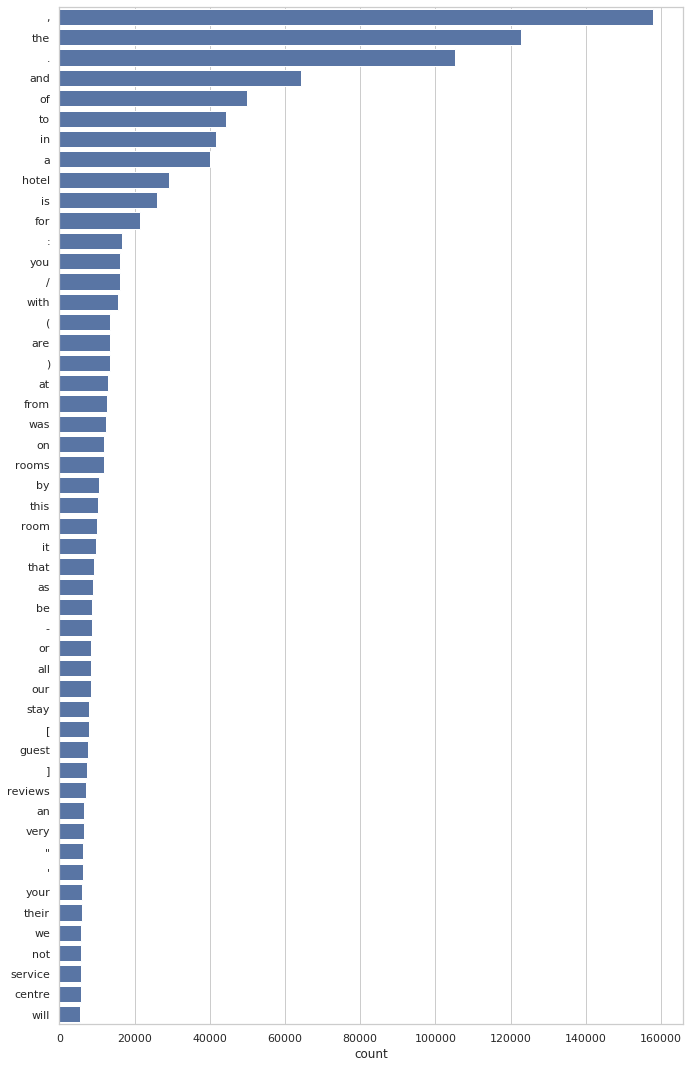

In [10]:
counter = collections.Counter(
    word.lower() for word in itertools.chain.from_iterable(samples_en)
)

df = pd.DataFrame(data=counter.most_common(50), columns=('word', 'count'))

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x='count', y='word', data=df, label='Count', color='b')
fig.tight_layout()
ax.set_ylabel('')
fig.savefig('histogram_en_unfiltered.png')
fig.savefig('histogram_en_unfiltered.eps')

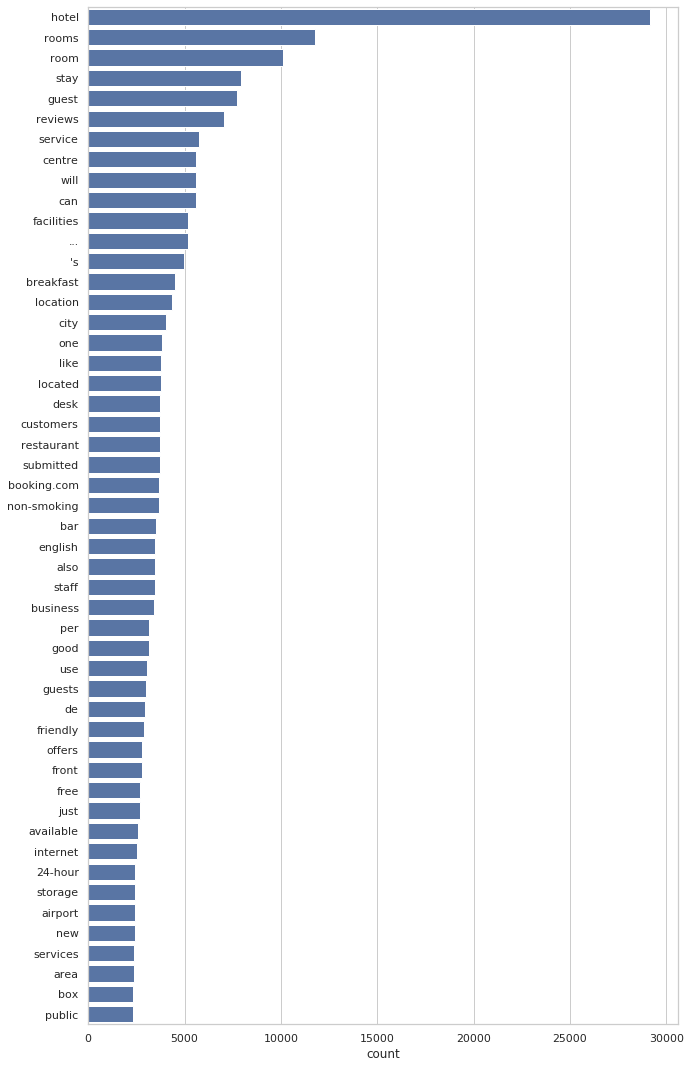

In [11]:
counter = collections.Counter(
    word.lower() for word in itertools.chain.from_iterable(samples_en)
    if word.lower() not in stopwords_en and len(word) > 1
)

df = pd.DataFrame(data=counter.most_common(50), columns=('word', 'count'))

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x='count', y='word', data=df, label='Count', color='b')
fig.tight_layout()
ax.set_ylabel('')
fig.savefig('histogram_en.png')
fig.savefig('histogram_en.eps')

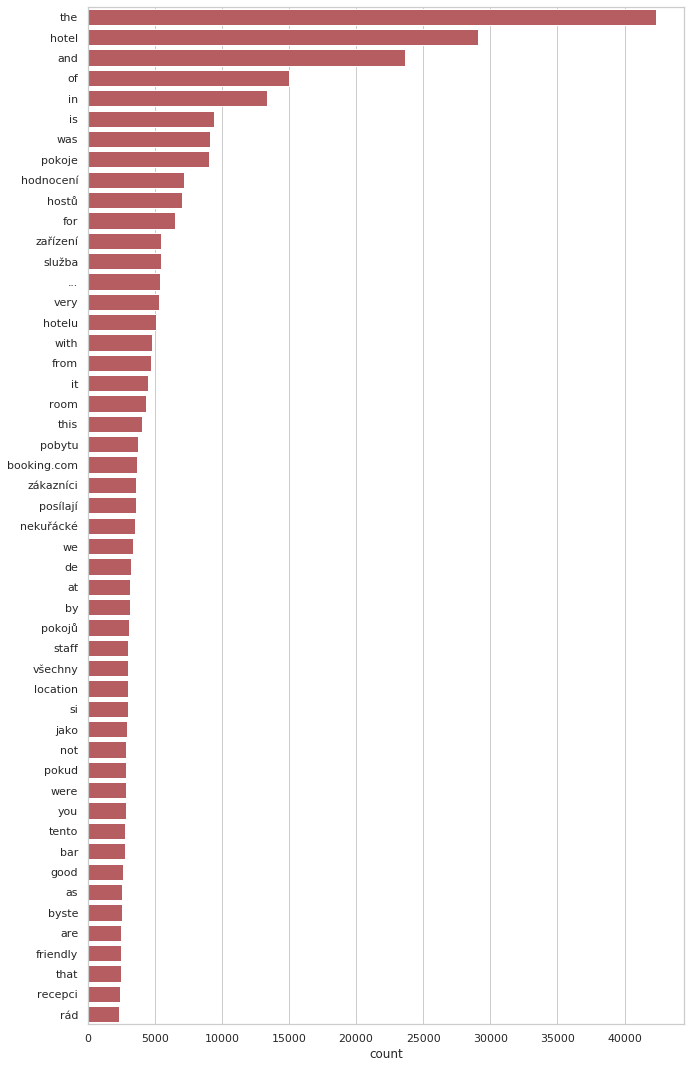

In [12]:
counter = collections.Counter(
    word.lower() for word in itertools.chain.from_iterable(samples_cs)
    if word.lower() not in stopwords_cs and len(word) > 1
)

df = pd.DataFrame(data=counter.most_common(50), columns=('word', 'count'))

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(x='count', y='word', data=df, label='Count', color='r')
fig.tight_layout()
ax.set_ylabel('')
fig.savefig('histogram_cs.png')
fig.savefig('histogram_cs.eps')

In [13]:
samples_en_text = ' '.join(itertools.chain.from_iterable(samples_en))
samples_cs_text = ' '.join(itertools.chain.from_iterable(samples_cs))

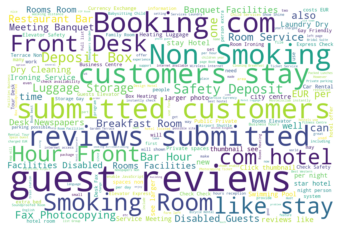

In [14]:
wordcloud = WordCloud(
    width=1500,
    height=1000,
    background_color='white',
    random_state = 42,
    stopwords=stopwords_en,
    min_word_length=2,
)
wordcloud.generate(samples_en_text)
wordcloud.to_file('wordcloud_en.png')
wordcloud.to_file('wordcloud_en.eps')

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

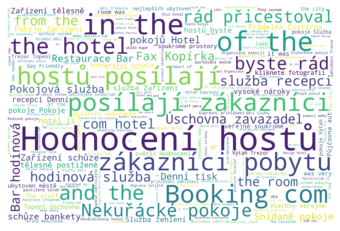

In [15]:
wordcloud = WordCloud(
    width=1500,
    height=1000,
    background_color='white',
    random_state = 42,
    stopwords=stopwords_cs,
    min_word_length=2,
)
wordcloud.generate(samples_cs_text)
wordcloud.to_file('wordcloud_cs.png')
wordcloud.to_file('wordcloud_cs.eps')

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()